In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [45]:
#Importing the dataset
df_train_G = pd.read_csv("/content/G_train.csv")
df_test_G = pd.read_csv("/content/G_test.csv")

In [46]:
df_train_G

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
0,2014-07-31 16:00:00,8.0,0.941176,0.262295,0.38,0.316667,24.0,0.075758,0.021368,0.046254,0.539510,0.016032,49.0
1,2014-07-31 17:00:00,8.0,0.921569,0.245902,0.41,0.291667,2.0,0.085859,0.021368,0.046506,0.558583,0.018036,49.0
2,2014-07-31 18:00:00,8.0,0.901961,0.262295,0.45,0.116667,2.0,0.101010,0.034188,0.049720,0.591281,0.022044,44.0
3,2014-07-31 19:00:00,8.0,0.882353,0.262295,0.48,0.166667,2.0,0.106061,0.042735,0.052366,0.550409,0.020040,50.0
4,2014-07-31 20:00:00,8.0,0.882353,0.262295,0.52,0.166667,2.0,0.119949,0.115385,0.062134,0.430518,0.036072,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,2015-03-07 02:00:00,2.0,0.411765,0.557377,0.93,0.196759,4.0,0.022727,0.068376,0.063016,0.046322,0.018036,9.0
5243,2015-03-07 03:00:00,2.0,0.411765,0.557377,0.93,0.069444,4.0,0.021465,0.068376,0.060495,0.038147,0.018036,8.0
5244,2015-03-07 04:00:00,2.0,0.411765,0.557377,0.93,0.196759,4.0,0.013889,0.059829,0.056714,0.046322,0.018036,7.0
5245,2015-03-07 05:00:00,2.0,0.411765,0.557377,0.92,0.196759,4.0,0.013889,0.059829,0.054824,0.046322,0.018036,8.0


In [47]:
df_train_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5247 non-null   object 
 1   weather             5247 non-null   float64
 2   temperature         5247 non-null   float64
 3   pressure            5247 non-null   float64
 4   humidity            5247 non-null   float64
 5   wind_speed          5247 non-null   float64
 6   wind_direction      5247 non-null   float64
 7   PM10_Concentration  5247 non-null   float64
 8   NO2_Concentration   5247 non-null   float64
 9   CO_Concentration    5247 non-null   float64
 10  O3_Concentration    5247 non-null   float64
 11  SO2_Concentration   5247 non-null   float64
 12  PM25_Concentration  5247 non-null   float64
dtypes: float64(12), object(1)
memory usage: 533.0+ KB


In [48]:
print("Shape of train data:" + str(df_train_G.shape))
print("Shape of test data:" + str(df_test_G.shape))

Shape of train data:(5247, 13)
Shape of test data:(1289, 13)


In [49]:
train_arr = df_train_G
test_arr = df_test_G

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_to_drop' is the column you want to drop
column_to_drop = 'Unnamed: 0'

# Dropping the column
df_train_G = train_arr.drop(column_to_drop, axis=1)
df_test_G = test_arr.drop(column_to_drop, axis=1)

In [77]:
X_train = df_train_G[['weather', 'temperature', 'pressure', 'humidity', 'wind_speed',
       'wind_direction', 'PM10_Concentration', 'NO2_Concentration',
       'CO_Concentration', 'O3_Concentration', 'SO2_Concentration']]

In [78]:
y_train = df_train_G[['PM25_Concentration']]

In [76]:
X_test = df_test_G[['weather', 'temperature', 'pressure', 'humidity', 'wind_speed',
       'wind_direction', 'PM10_Concentration', 'NO2_Concentration',
       'CO_Concentration', 'O3_Concentration', 'SO2_Concentration']]

In [79]:
y_test = df_test_G[['PM25_Concentration']]

In [56]:
num_columns = X_train.shape[1]
print("Number of columns:", num_columns)

Number of columns: 11


In [57]:
num_columns = y_test.shape[1]
print("Number of columns:", num_columns)

Number of columns: 1


In [58]:
print(y_test.shape)

(1289, 1)


In [59]:
print(y_train.shape)

(5247, 1)


In [60]:
print(X_train)

      weather  temperature  pressure  humidity  wind_speed  wind_direction  \
0         8.0     0.941176  0.262295      0.38    0.316667            24.0   
1         8.0     0.921569  0.245902      0.41    0.291667             2.0   
2         8.0     0.901961  0.262295      0.45    0.116667             2.0   
3         8.0     0.882353  0.262295      0.48    0.166667             2.0   
4         8.0     0.882353  0.262295      0.52    0.166667             2.0   
...       ...          ...       ...       ...         ...             ...   
5242      2.0     0.411765  0.557377      0.93    0.196759             4.0   
5243      2.0     0.411765  0.557377      0.93    0.069444             4.0   
5244      2.0     0.411765  0.557377      0.93    0.196759             4.0   
5245      2.0     0.411765  0.557377      0.92    0.196759             4.0   
5246      2.0     0.411765  0.557377      0.92    0.069444             4.0   

      PM10_Concentration  NO2_Concentration  CO_Concentration  

In [61]:
print(y_train)

      PM25_Concentration
0                   49.0
1                   49.0
2                   44.0
3                   50.0
4                   57.0
...                  ...
5242                 9.0
5243                 8.0
5244                 7.0
5245                 8.0
5246                 8.0

[5247 rows x 1 columns]


In [62]:
print(X_test)

      weather  temperature  pressure  humidity  wind_speed  wind_direction  \
0         2.0     0.411765  0.590164      0.92    0.196759             4.0   
1         2.0     0.431373  0.590164      0.91    0.069444             4.0   
2         2.0     0.431373  0.606557      0.90    0.196759            14.0   
3         2.0     0.470588  0.606557      0.84    0.069444             4.0   
4         2.0     0.470588  0.590164      0.81    0.196759            24.0   
...       ...          ...       ...       ...         ...             ...   
1284      8.0     0.725490  0.409836      0.71    0.358796             1.0   
1285      8.0     0.725490  0.426230      0.75    0.196759             1.0   
1286      8.0     0.705882  0.442623      0.81    0.069444            13.0   
1287      8.0     0.705882  0.459016      0.86    0.069444             1.0   
1288      8.0     0.666667  0.459016      0.97    0.069444            14.0   

      PM10_Concentration  NO2_Concentration  CO_Concentration  

In [63]:
print(y_test)

      PM25_Concentration
0                    8.0
1                    9.0
2                   10.0
3                   11.0
4                   12.0
...                  ...
1284                73.0
1285                31.0
1286                32.0
1287                32.0
1288                42.0

[1289 rows x 1 columns]


In [64]:
import numpy as np

# Assuming 'y_train' is a DataFrame
y_train_array = y_train.to_numpy()

# Reshape the NumPy array
y_train_reshaped = y_train_array.reshape(-1, 1)

In [65]:
# Prepare sequences for multistep forecasting
def create_sequences(X_train,y_train, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(X_train) - n_steps_in - n_steps_out):
        X.append(X_train[i:i + n_steps_in])
        y.append(y_train[i + n_steps_in:i + n_steps_in + n_steps_out])
    return np.array(X), np.array(y)

In [66]:
n_steps_in = 12 # Number of time steps as input
n_steps_out = 5  # Number of time steps to predict ahead

X_train_predict, y_train_predict = create_sequences(X_train,y_train, n_steps_in, n_steps_out)
X_test_predict, y_test_predict = create_sequences(X_test, y_test, n_steps_in, n_steps_out)

In [67]:
#Importing the necessary components to define our model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [68]:
from keras.losses import MeanSquaredError

# defining the stacked LSTM model
model = Sequential(name='LSTM-Model')
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(12, 11), name="LSTM_1"))
model.add(LSTM(100, activation='relu', return_sequences=False, name="LSTM_2"))  # Change return_sequences if needed
model.add(Dense(1, name="DENSE_1"))  # Adjust units according to your output dimensions

# Compile the model with mean squared error loss for multidimensional output
model.compile(optimizer='adam', loss=MeanSquaredError())

model.summary()

Model: "LSTM-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, 12, 100)           44800     
                                                                 
 LSTM_2 (LSTM)               (None, 100)               80400     
                                                                 
 DENSE_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 125301 (489.46 KB)
Trainable params: 125301 (489.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


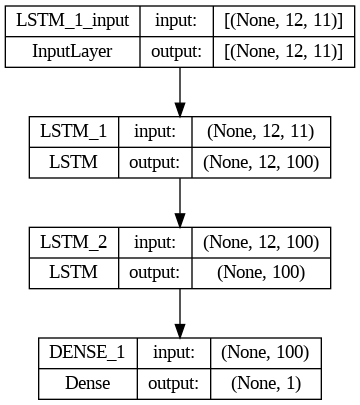

In [69]:
#Plotting the layer structure
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,rankdir="TB",dpi=96)

In [70]:
print(X_test_predict.shape)

(1272, 12, 11)


In [71]:
print(X_train_predict.shape)

(5230, 12, 11)


In [72]:
print(y_train_predict.shape)

(5230, 5, 1)


In [73]:
print(y_test_predict)

[[[36.]
  [45.]
  [44.]
  [42.]
  [44.]]

 [[45.]
  [44.]
  [42.]
  [44.]
  [45.]]

 [[44.]
  [42.]
  [44.]
  [45.]
  [45.]]

 ...

 [[93.]
  [69.]
  [64.]
  [73.]
  [31.]]

 [[69.]
  [64.]
  [73.]
  [31.]
  [32.]]

 [[64.]
  [73.]
  [31.]
  [32.]
  [32.]]]


In [74]:
print(y_test_predict.shape)

(1272, 5, 1)


In [81]:
history = model.fit(X_train_predict, y_train_predict, epochs=50, batch_size=90, verbose=2, shuffle=False)


# from keras.callbacks import EarlyStopping

# # Define the early stopping criteria
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# # Assuming 'X_train' and 'y_train' are your training data
# # Fit the model with early stopping
# history = model.fit(X_train_predict, y_train_predict, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/50
59/59 - 2s - loss: 363.1417 - 2s/epoch - 40ms/step
Epoch 2/50
59/59 - 2s - loss: 361.5732 - 2s/epoch - 34ms/step
Epoch 3/50
59/59 - 2s - loss: 366.8500 - 2s/epoch - 35ms/step
Epoch 4/50
59/59 - 5s - loss: 372.0826 - 5s/epoch - 76ms/step
Epoch 5/50
59/59 - 5s - loss: 366.2956 - 5s/epoch - 90ms/step
Epoch 6/50
59/59 - 5s - loss: 355.0060 - 5s/epoch - 93ms/step
Epoch 7/50
59/59 - 5s - loss: 345.9665 - 5s/epoch - 93ms/step
Epoch 8/50
59/59 - 5s - loss: 359.9446 - 5s/epoch - 90ms/step
Epoch 9/50
59/59 - 4s - loss: 365.1266 - 4s/epoch - 73ms/step
Epoch 10/50
59/59 - 5s - loss: 370.2668 - 5s/epoch - 79ms/step
Epoch 11/50
59/59 - 3s - loss: 340.5718 - 3s/epoch - 56ms/step
Epoch 12/50
59/59 - 2s - loss: 341.3561 - 2s/epoch - 35ms/step
Epoch 13/50
59/59 - 2s - loss: 328.7227 - 2s/epoch - 37ms/step
Epoch 14/50
59/59 - 2s - loss: 336.8929 - 2s/epoch - 37ms/step
Epoch 15/50
59/59 - 2s - loss: 336.5408 - 2s/epoch - 37ms/step
Epoch 16/50
59/59 - 3s - loss: 331.4857 - 3s/epoch - 51ms/step
E

In [82]:
y_pred = model.predict(X_test_predict)

40/40 [==============================] - 1s 6ms/step


In [83]:
print(y_pred.shape)

(1272, 1)


In [84]:
print(y_pred)

[[44.217724]
 [48.96463 ]
 [52.397995]
 ...
 [79.189384]
 [96.48862 ]
 [96.819084]]


In [85]:
for prediction in y_pred:
    last_value = prediction[-1]  # Assuming the last column is the target variable
    print(last_value)

44.217724
48.96463
52.397995
55.458755
60.12731
59.037045
62.385773
68.79425
74.23608
78.409355
73.11035
73.19183
61.494755
56.181496
58.6468
62.710773
65.61433
66.270004
66.78952
67.30567
71.017006
65.62274
68.280045
74.76926
76.727196
71.0987
74.78187
83.5981
94.32629
93.1011
82.848526
75.75648
71.31836
65.30541
67.33836
63.258575
58.32609
70.47233
65.044655
58.7838
56.805244
59.648006
54.499573
49.10434
47.195267
45.391296
42.67539
40.569756
41.068813
42.80812
40.320152
41.070488
38.82136
34.403526
32.02214
33.06967
32.592335
31.735767
30.736786
32.364822
35.154427
34.632374
38.354027
38.67836
37.13144
36.79416
35.863434
36.85511
37.773693
37.164425
36.446552
38.314873
37.255695
37.411034
37.114433
36.90183
36.290806
35.90575
35.55429
36.393875
36.0285
36.040062
35.579693
35.430977
35.07938
34.64822
34.077454
35.369804
32.48881
31.180254
32.366817
30.376465
28.415804
29.483644
27.843777
25.81604
26.622152
26.075651
27.797049
29.731306
30.01789
30.737318
29.671692
30.32071
31.486015


In [86]:
print(y_test.shape)

(1289, 1)


In [87]:
print(y_test.shape)

(1289, 1)


In [88]:
y_test = y_test[n_steps_in: -n_steps_out]

In [89]:
print(y_test.shape)

(1272, 1)


In [90]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_squared_error(y_test, y_pred)

652.5368596427295

In [91]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mean_absolute_error(y_test, y_pred)

19.444982932048774